In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import statsmodels.stats.weightstats as stw
import statsmodels.stats.proportion as stp

In [42]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [43]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [44]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


In [45]:
bins = [0, 1, 3, 10, df2["rat_arrival_number"].max()]
labels = ["no_rat", "low", "medium", "high"]
df2["rat_density"] = pd.cut(df2["rat_arrival_number"], bins=bins, labels=labels, include_lowest=True)


In [46]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_density
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0,no_rat
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0,no_rat
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0,no_rat
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0,no_rat
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0,no_rat


In [47]:

mean = df2["bat_landing_number"].mean()
s = df2["bat_landing_number"].std(ddof=1)
n = len(df2["bat_landing_number"])
se = s / math.sqrt(n)

ci_low, ci_up = stm_weight._zconfint_generic(mean_x, se, alpha=0.05, alternative="two-sided")
print("CI for mean bat_landing_number (95%):", (ci_low, ci_up))
z_score = st.norm.ppf(q = 0.975)
print("Z-statistic: %.2f" % z_score)


ci_low_stm, ci_upp_stm = stw._zconfint_generic(mean,se,z_score, alternative="two-sided")
print("Confidence Interval of the mean: %.2f to %.2f" % (ci_low_stm, ci_upp_stm))

CI for mean bat_landing_number (95%): (np.float64(30.99379588577961), np.float64(33.17294928614692))
Z-statistic: 1.96
Confidence Interval of the mean: 33.22 to 30.94


In [48]:
sample = df2["bat_landing_number"]
x_bar = st.tmean(sample)
s = st.tstd(sample)
print("\t Sample mean: %.2f" % x_bar)
print("\t Sample std. dev.: %.2f" % s)


	 Sample mean: 32.08
	 Sample std. dev.: 25.61


In [49]:

# perform one-sample t-test
# null hypothesis: population mean = 50
# alternative hypothesis: population mean < 50 (in the function below, note the argument 'greater')
t_stat, p_val = st.ttest_1samp(sample, 50, alternative="less")
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stat)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


 Computing t* ...
	 t-statistic (t*): -32.23

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


In [50]:
sample1 = df2['bat_landing_number'].to_numpy()
sample2 = df2['rat_arrival_number'].to_numpy()

x_bar1 = st.tmean(sample1)
s1 = st.tstd(sample1)
n1 = len(sample1)
print("\t Statistics of sample 1: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar1, s1, n1))


# the basic statistics of sample 2:
x_bar2 = st.tmean(sample2)
s2 = st.tstd(sample2)
n2 = len(sample2)
print("\t Statistics of sample 2: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar2, s2, n2))


	 Statistics of sample 1: 32.083 (mean), 25.614 (std. dev.), and 2123 (n).
	 Statistics of sample 2: 0.445 (mean), 1.019 (std. dev.), and 2123 (n).


In [51]:
# perform two-sample t-test
# null hypothesis: mean of sample 1 = mean of sample 2
# alternative hypothesis: mean of sample 1 is greater than mean of sample 2 (one-sided test)
# note the argument equal_var=False, which assumes that two populations do not have equal variance
t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='greater')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")



 Computing t* ...
	 t-statistic (t*): 56.87

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


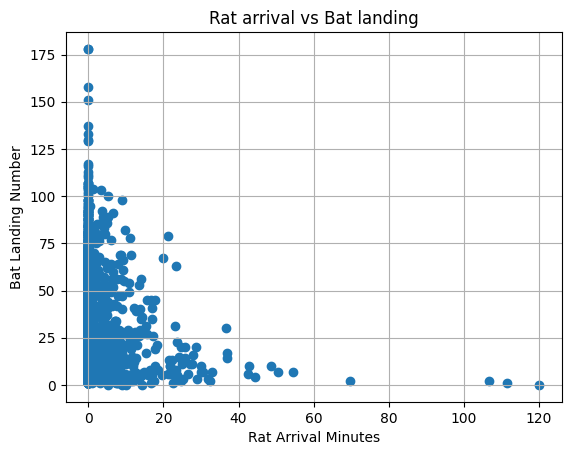

Model with intercept:
Intercept:  33.18300650358429
Coefficient:  [-0.55134921]


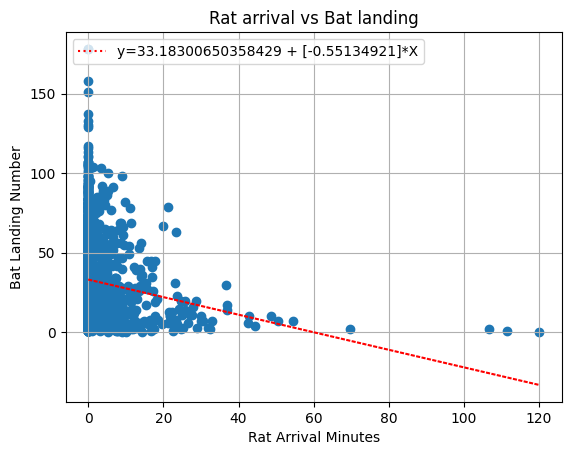

In [52]:
# Bats landing correlate to rats arrival 
X = df2['rat_minutes'].values
y = df2['bat_landing_number'].values


# Plot data points as a scatterplot 
plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Minutes")
plt.ylabel("Bat Landing Number")
plt.grid()
plt.show()


# Model 1 #
# Initialise a linear regression model
model = LinearRegression()

# Fit the linear regression model on the data
model.fit(X.reshape(-1,1), y)

# Get the intercept and coefficient values
intercept = model.intercept_
coeff_intercept = model.coef_ 
print("Model with intercept:")
print("Intercept: ", intercept)
print("Coefficient: ", coeff_intercept)

# Visualise the regression line over all data points
x_line1 = X
y_line1 = x_line1 * coeff_intercept + intercept

plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Minutes")
plt.ylabel("Bat Landing Number")
plt.plot(x_line1, y_line1, ":r", label=f"y={intercept} + {coeff_intercept}*X")
plt.legend(loc='upper left')
plt.grid()
plt.show()


**If Rats were present in the food platform Bats were less landing**